# German Credit
Load the CSV file GermanCredit.csv (1000 records) into a Pandas DataFrame, and perform the following tasks on it.

In [2]:
import pandas as pd

gcred = pd.read_csv("../data/GermanCredit.csv")

## Preprocessing
1. Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero
‘none’ values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the
analysis, you can call your code for n = 3.)

In [3]:
import numpy as np

n_dropped = 3
num_nones = gcred.isnull().sum(axis = 0)
max_val = np.max(num_nones)
grouped = num_nones.to_frame(0).groupby(0)
gcred_cols = list(gcred.columns)

if max_val > 0:
    for num_nones, group in grouped:
        if num_nones == max_val:
            columns = [i for i in group[0].keys()]

            n = min(n_dropped, len(columns))
            indices = [gcred_cols.index(i) for i in columns]
            gcred = gcred.drop(gcred.columns[indices], axis=1)

display(gcred.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

2. Certain values in some of the columns contain unnecessary apostrophes ('). Remove the apostrophes.

In [4]:
gcred = gcred.replace("'","",regex=True)
display(gcred.head(10))

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,no checking,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


3. The checking_status column has values in 4 categories:
    - 'no checking'
    - '<0'
    - '0<=X<200'
    - '>=200'

    Change these to:
    - 'No Checking'
    - 'Low'
    - 'Medium'
    - 'High'

In [5]:
checking_replace_map = {"no checking":"No Checking", "<0":"Low", "0<=X<200":"Medium", ">=200":"High"}
for (k,v) in checking_replace_map.items():
    gcred['checking_status'] = gcred['checking_status'].str.replace(k,v,regex=True)

display(gcred.head(10))

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,No Checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,No Checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,Medium,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,No Checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,No Checking,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


5. The savings_status column has values in 4 categories:
    1. 'no known savings'
    2. '<100'
    3. '100<=X<500'
    4. '500<=X<1000'
    5. '>=1000'.
    
    Change these to:
    1. 'No Savings'
    2. 'Low'
    3. 'Medium'
    4. 'High'
    5. 'High'
    
    respectively. (Note that the last two are both 'High').

In [6]:
saving_replace_map = {
    "no known savings": "No Checking",
    r"^<100$":             "Low",
    r"^100<=X<500$":       "Medium",
    r"^500<=X<1000$":      "High",
    r"^>=1000$":           "High",
}
for (k,v) in saving_replace_map.items():
    gcred['savings_status'] = gcred['savings_status'].str.replace(k,v,regex=True)
gcred.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Checking,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,No Checking,36,existing paid,education,9055,No Checking,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,No Checking,24,existing paid,furniture/equipment,2835,High,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,Medium,36,existing paid,used car,6948,Low,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,No Checking,12,existing paid,radio/tv,3059,High,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,No Checking,30,critical/other existing credit,new car,5234,Low,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


6. Change class column values from 'good' to '1' and 'bad' to '0', and change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [7]:
replacement_map = {
    "class": {
        "good":     "1",
        "bad":      "0"
    },
    "employment": {
        "unemployed":   "Unemployed",
        "<1":           "Amateur",
        "1<=X<4":       "Professional",
        "4<=X<7":       "Experienced",
        ">=7":          "Expert"
    },
}

for (col, map) in replacement_map.items():
    for (old, new) in map.items():
        gcred[col] = gcred[col].str.replace(old, new, regex=True)

gcred.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Checking,Expert,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
5,No Checking,36,existing paid,education,9055,No Checking,Professional,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,1
6,No Checking,24,existing paid,furniture/equipment,2835,High,Expert,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,1
7,Medium,36,existing paid,used car,6948,Low,Professional,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,1
8,No Checking,12,existing paid,radio/tv,3059,High,Experienced,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,1
9,No Checking,30,critical/other existing credit,new car,5234,Low,Unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,0


## Analysis
For the following tasks, do preprocessing or changing of data types in the
data frame as required.

1. Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as “yes”/“no” for attr1, or “low”,“medium”,“high” for attr2.

    One such correlation is to find counts in combinations of categorial
    values across attributes, as in how many instances are “yes” for attr1 and “low” for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

    (a)&nbsp; Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).
    
    (b)&nbsp; Similarly, get the count of each category of employment for each category of saving_status

In [8]:
foreign_credit = pd.crosstab(gcred['foreign_worker'], gcred['class'])
display(foreign_credit)

employment_savings = pd.crosstab(gcred['employment'], gcred['savings_status'])
display(employment_savings)

class,0,1
foreign_worker,,
no,4,33
yes,296,667


savings_status,High,Low,Medium,No Checking
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


2. Find the average credit_amount of single males that have 4 ≤ x < 7 years of employment. You can leave the raw result as is, no need for rounding.

In [9]:
avg_credit = gcred['credit_amount'][gcred['personal_status'] == 'male single'][gcred['employment'] == 'Experienced'].mean()
print(avg_credit)

4142.592592592592


3. Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [10]:
employment_dur = gcred[['employment','duration']]
grouped_jobtypes = employment_dur.groupby(employment_dur['employment'])
averaged = grouped_jobtypes['duration'].mean()
display(averaged)

employment
Amateur         19.401163
Experienced     22.994253
Expert          21.264822
Professional    20.365782
Unemployed      20.661290
Name: duration, dtype: float64

4. For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
Most common checking status: ...
Most common savings status: ...

In [11]:
mode_checkings = gcred['checking_status'][gcred['purpose'] == 'education'].mode()
mode_savings = gcred['savings_status'][gcred['purpose'] == 'education'].mode()

print("Most common checking status: "   + mode_checkings.values[0])
print("Most common savings status: "    + mode_savings.values[0])

Most common checking status: No Checking
Most common savings status: Low


## Visualization
1. Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

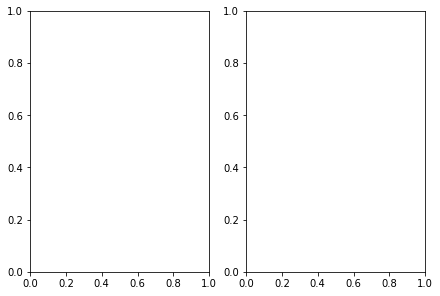

In [12]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,  2, constrained_layout=True)

2. For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).


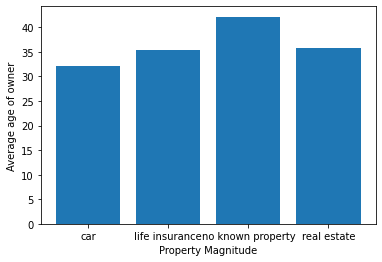

In [13]:
subset = gcred[['property_magnitude','age']][gcred['credit_amount'] > 4000]
grouped = subset.groupby('property_magnitude').mean()

keys = subset['property_magnitude'].unique()
values = next(grouped.items())[1]
avgs = {i[0]:i[1] for i in values.items()}

plt.bar(avgs.keys(), avgs.values())
plt.xlabel("Property Magnitude")
plt.ylabel("Average age of owner")
plt.show()

3. For people with a “High” savings_status and age above 40, use subplots to plot the following pie charts:
   1. Personal status
   2. Credit history
   3. Job

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_20544\2609369509.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = gcred[gcred["savings_status"] == "High"][gcred["age"] > 40]


([<matplotlib.patches.Wedge at 0x227632b6820>,
 [Text(-0.6059867336244251, 0.9180305434304461, ''),
  Text(0.24477316361895687, -1.072420672297941, ''),
  Text(0.9442937504989636, -0.5641890753715473, ''),
  Text(1.082322574845662, -0.19641243336269856, '')])

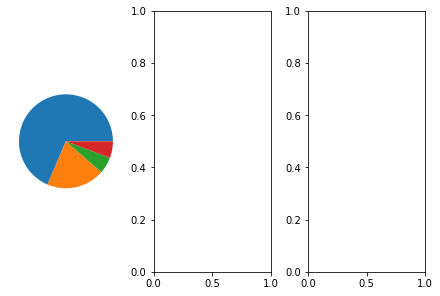

In [33]:
subset = gcred[gcred["savings_status"] == "High"][gcred["age"] > 40]

fig, axs = plt.subplots(1, 3, constrained_layout=True)

axs[0].pie(subset['personal_status'].value_counts())
axs[0].set_title("Personal Status Distribution")



